In [1]:
import numpy as np
from os.path import dirname, join as pjoin
import scipy.io as sio
import matplotlib.pyplot as plt
import fnmatch
import os
import itertools
import cv2

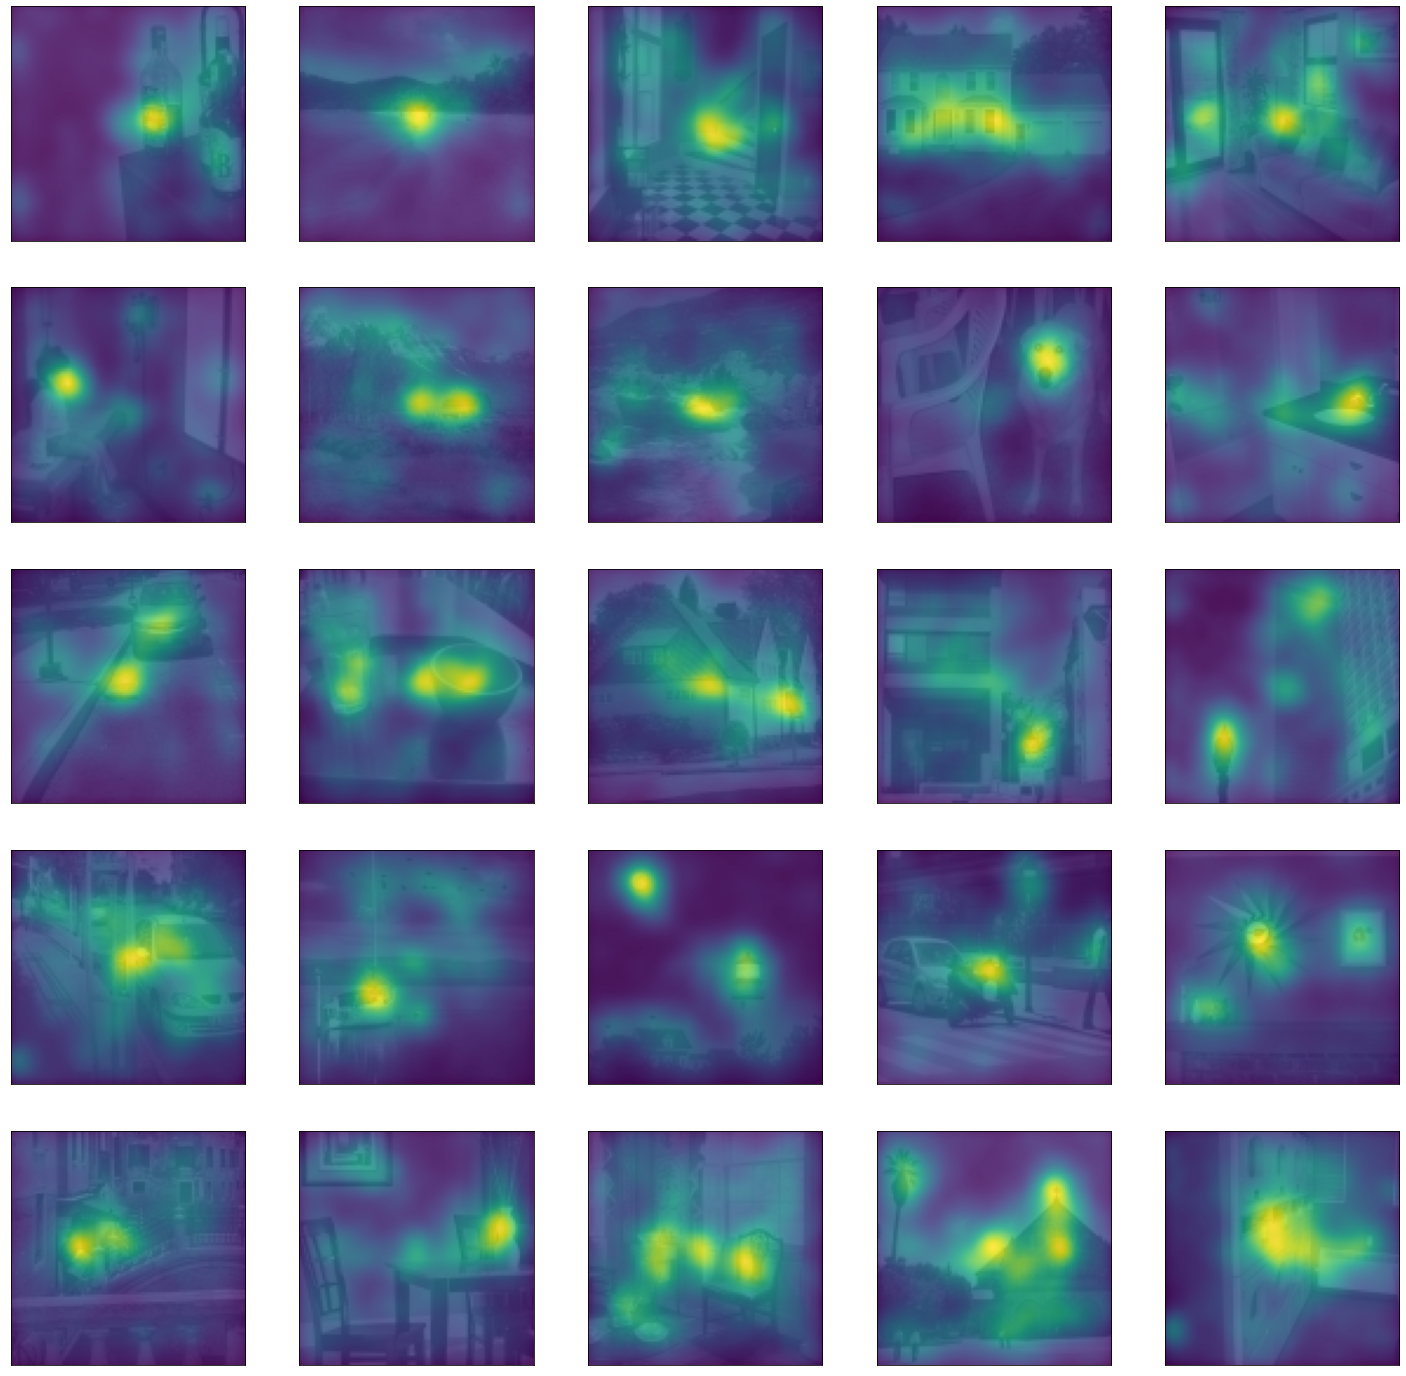

In [2]:
# data directory path
data_dir = dirname('human-maps/')
# files in the directory
dir_fls = os.listdir(data_dir)

################################
######### IMAGE FILES ##########
################################

# get list of images
image_fls = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*image.mat')]  
image_fls = sorted(image_fls)

################################
####### HUMAN DATA FILES #######
################################

# all file names start with image IDs ("img10", "img115", ...), so sorting like this should be OK... 

# get the list of patch rating maps
human_PC = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*humanPC.mat')]  
human_PC = sorted(human_PC)

# get the list of patch rating maps
ptch_fls = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*patchRate.mat')]  
ptch_fls = sorted(ptch_fls)

# get the list of discrimination accuracy maps
disc_fls = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*discr.mat')]  
disc_fls = sorted(disc_fls)

# get the list of discrimination accuracy maps
KDE_fls = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*chainKDE.mat')]  
KDE_fls = sorted(KDE_fls)

# get list of free view fixations
feye_fls = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*freeFIX.mat')]  
feye_fls = sorted(feye_fls)

# get list of free saliency search fixations
seye_fls = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*salFIX.mat')]  
seye_fls = sorted(seye_fls)

# get list of free object search fixations
oeye_fls = [fl for fl in dir_fls if fnmatch.fnmatch(fl, '*objFIX.mat')]  
oeye_fls = sorted(oeye_fls)


################################
########### EXAMPLE ############
################################

# path to specific (patch) map
mat_fname = pjoin(data_dir, ptch_fls[0])
# load mat file
mat_contents = sio.loadmat(mat_fname)
# the normalized map is called "map" in all cases
# print(sorted(mat_contents.keys()))
# use 'map' key
mp = mat_contents['map']


################################
########### SUBPLOT ############
################################

# Subplot indices
plt_rows = [0,1,2,3,4]
sub_plt_idx = [p for p in itertools.product(plt_rows, repeat=2)]
# Subplot dimensions
fig, axes = plt.subplots(5,5, figsize=(25,25))
# alpha transparency
ALPHA = 0.85
# colormap
CMAP = 'viridis'

################################
########## VIEW MAPS ###########
################################

# CHOOSE MAP ---> 
view_fls = human_PC  # HUMAN PC
# view_fls = ptch_fls  # PATCH RATINGS
# view_fls = disc_fls   # DISCRIMINATION
# view_fls = KDE_fls  # CHAIN KDES
# view_fls = feye_fls   # FREE FIXATION
# view_fls = seye_fls # SALIENCY SEARCH
# view_fls = oeye_fls # OBJECT SEARCH

for i in range(len(view_fls)):

    # path to specific (patch) map
    mat_fname = pjoin(data_dir, view_fls[i])
    mat_contents = sio.loadmat(mat_fname)
    # the normalized map is called "map" in all cases
    # print(sorted(mat_contents.keys()))
    # use 'map' key
    mp = mat_contents['map']
    
    # read in image
    im_fname = pjoin(data_dir, image_fls[i])
    im_contents = sio.loadmat(im_fname)
    im = im_contents['im']
    # resize
    im = cv2.resize(im, mp.shape, interpolation = cv2.INTER_AREA)
    # grayscale
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)    
    
    # subplot indices
    rw = sub_plt_idx[i][0]
    cl = sub_plt_idx[i][1]
    # imagesc map 
    axes[rw][cl].imshow(im, cmap = 'gray', extent=[0, 1, 0, 1])
    axes[rw][cl].imshow(mp, cmap = CMAP, alpha = ALPHA, extent=[0, 1, 0, 1])
    # remove irrelevant axes
    axes[rw][cl].get_xaxis().set_visible(False)
    axes[rw][cl].get_yaxis().set_visible(False)
    # show
plt.show()